<a href="https://colab.research.google.com/github/oonhy/Data/blob/main/SNU/practice_week_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

population_mean = 50
population_std = 10
population_size = 1000000
np.random.seed(42)
population = np.random.normal(population_mean, population_std, population_size)

sample_sizes = [10, 30, 100, 500, 1000]
for n in sample_sizes:
    sample_means = [np.mean(np.random.choice(population, n, replace=True)) for _ in range(1000)]
    empirical_variance = np.var(sample_means, ddof=1)
    theoretical_variance = (population_std**2) / n
    print(f'Sample size: {n}')
    print(f'Empirical variance of sample means: {empirical_variance:.4f}')
    print(f'Theoretical variance (σ²/n): {theoretical_variance:.4f}')
    print(f'Difference: {abs(empirical_variance/theoretical_variance):.4f}\n')

Sample size: 10
Empirical variance of sample means: 10.4977
Theoretical variance (σ²/n): 10.0000
Difference: 1.0498

Sample size: 30
Empirical variance of sample means: 3.5321
Theoretical variance (σ²/n): 3.3333
Difference: 1.0596

Sample size: 100
Empirical variance of sample means: 1.0429
Theoretical variance (σ²/n): 1.0000
Difference: 1.0429

Sample size: 500
Empirical variance of sample means: 0.1950
Theoretical variance (σ²/n): 0.2000
Difference: 0.9751

Sample size: 1000
Empirical variance of sample means: 0.1022
Theoretical variance (σ²/n): 0.1000
Difference: 1.0225



In [2]:
sample_size = 30
sample_mean = 0.5
sample_std = 2.1
standard_error = sample_std / np.sqrt(sample_size)

population_mean = 0
statistic = (sample_mean - population_mean) / standard_error
print(f'statistic: {statistic:.2f}')

statistic: 1.30


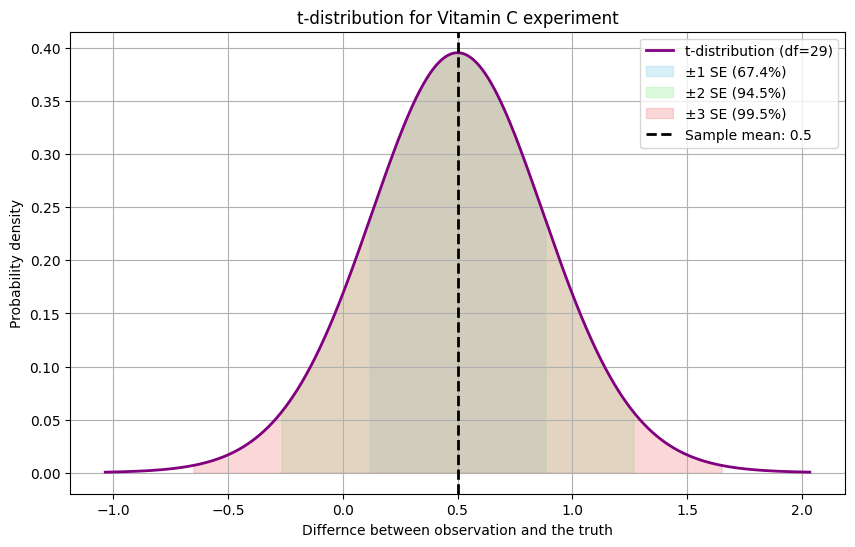

In [3]:
import matplotlib.pyplot as plt
from scipy.stats import t

df = sample_size - 1

x_values = np.linspace(sample_mean - 4*standard_error, sample_mean + 4*standard_error, 1000)
y_values = t.pdf((x_values - sample_mean) / standard_error, df)

se_ranges = [1, 2, 3]
colors = ['skyblue', 'lightgreen', 'lightcoral']
labels = []
auc_percentages = []
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label=f't-distribution (df={df})', color='purple', linewidth=2)
for i, se in enumerate(se_ranges):
    lower_bound = sample_mean - se * standard_error
    upper_bound = sample_mean + se * standard_error
    auc = t.cdf(se, df) - t.cdf(-se, df)
    auc_percentage = auc * 100
    auc_percentages.append(auc_percentage)
    plt.fill_between(x_values, y_values, where=(x_values >= lower_bound) & (x_values <= upper_bound),
                     color=colors[i], alpha=0.3, label=f'±{se} SE ({auc_percentage:.1f}%)')
plt.axvline(sample_mean, color='black', linestyle='--', linewidth=2, label=f'Sample mean: {sample_mean}')
plt.title('t-distribution for Vitamin C experiment')
plt.xlabel('Differnce between observation and the truth')
plt.ylabel('Probability density')
plt.legend()
plt.grid(True)
plt.show()

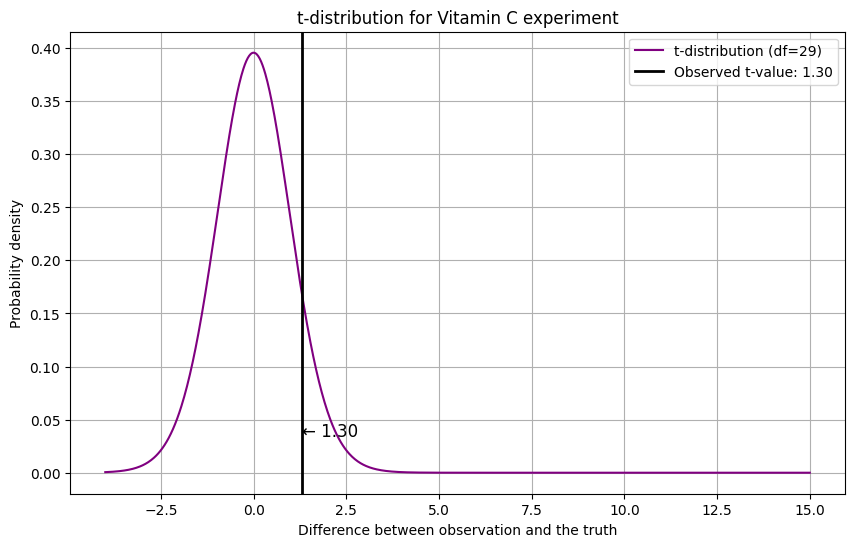

In [4]:
x_values = np.linspace(-4, 15, 1000)
y_values = t.pdf(x_values, df)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label=f't-distribution (df={df})', color='purple')
plt.axvline(statistic, color='black', linestyle='-', linewidth=2, label=f'Observed t-value: {statistic:.2f}')
plt.text(statistic, 0.03, f'← {statistic:.2f}', color='black', fontsize=12, verticalalignment='bottom')
plt.title('t-distribution for Vitamin C experiment')
plt.xlabel('Difference between observation and the truth')
plt.ylabel('Probability density')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
alpha = 0.05
t_critical = t.ppf(1 - alpha / 2, df)
print(f"t-critical value: {t_critical:.4f}")

t-critical value: 2.0452


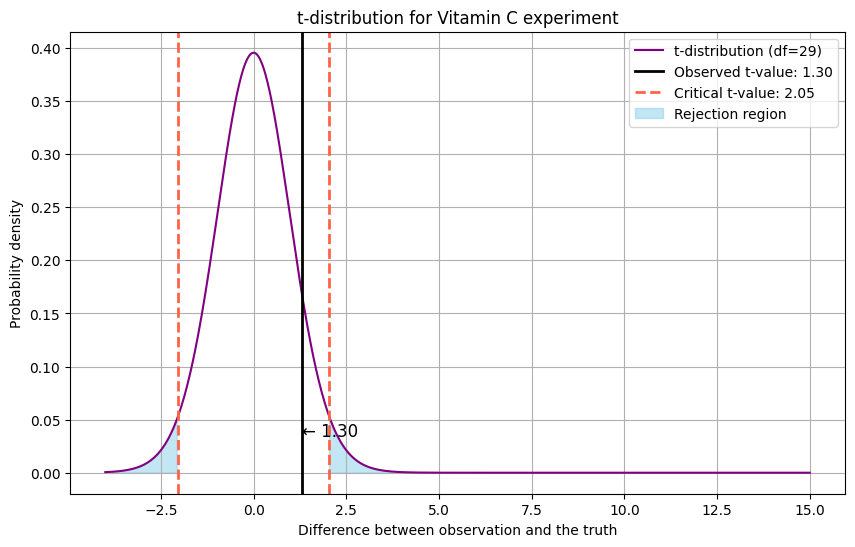

In [6]:
x_values = np.linspace(-4, 15, 1000)
y_values = t.pdf(x_values, df)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label=f't-distribution (df={df})', color='purple')
plt.axvline(statistic, color='black', linestyle='-', linewidth=2, label=f'Observed t-value: {statistic:.2f}')
plt.text(statistic, 0.03, f'← {statistic:.2f}', color='black', fontsize=12, verticalalignment='bottom')
plt.axvline(t_critical, color='tomato', linestyle='--', linewidth=2, label=f'Critical t-value: {t_critical:.2f}')
plt.axvline(-t_critical, color='tomato', linestyle='--', linewidth=2)
plt.fill_between(x_values, y_values, where=(x_values >= t_critical) | (x_values <= -t_critical), color='skyblue', alpha=0.5, label='Rejection region')
plt.title('t-distribution for Vitamin C experiment')
plt.xlabel('Difference between observation and the truth')
plt.ylabel('Probability density')
plt.legend()
plt.grid(True)
plt.show()

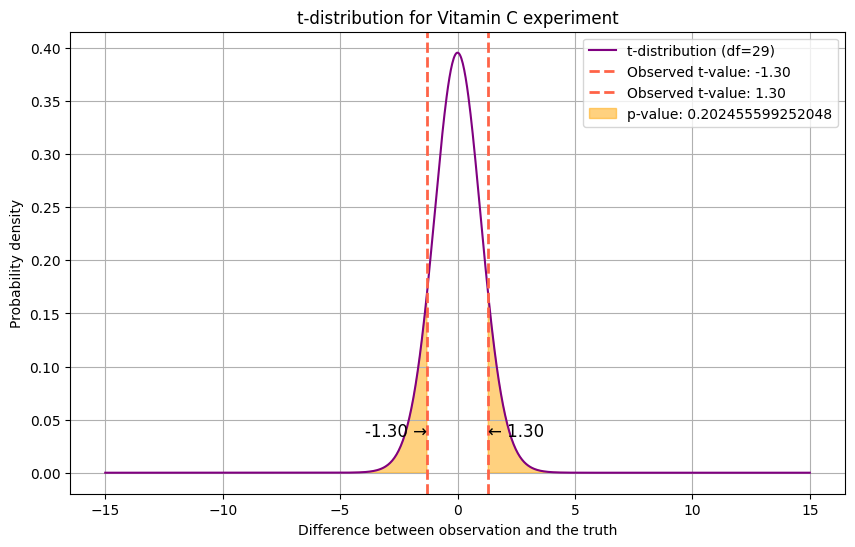

In [7]:
p_value = 2 * (1 - t.cdf(statistic, df))

x_values = np.linspace(-15, 15, 1000)
y_values = t.pdf(x_values, df)
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label=f't-distribution (df={df})', color='purple')
plt.axvline(-statistic, color='tomato', linestyle='--', linewidth=2, label=f'Observed t-value: {-statistic:.2f}')
plt.axvline(statistic, color='tomato', linestyle='--', linewidth=2, label=f'Observed t-value: {statistic:.2f}')
plt.text(-statistic, 0.03, f'{-statistic:.2f} →', color='black', fontsize=12, verticalalignment='bottom', horizontalalignment='right')
plt.text(statistic, 0.03, f'← {statistic:.2f}', color='black', fontsize=12, verticalalignment='bottom')
plt.fill_between(x_values, y_values, where=(x_values >= statistic) | (x_values <= -statistic), color='orange', alpha=0.5, label=f'p-value: {p_value:.15f}')
plt.title('t-distribution for Vitamin C experiment')
plt.xlabel('Difference between observation and the truth')
plt.ylabel('Probability density')
plt.legend()
plt.grid(True)
plt.show()

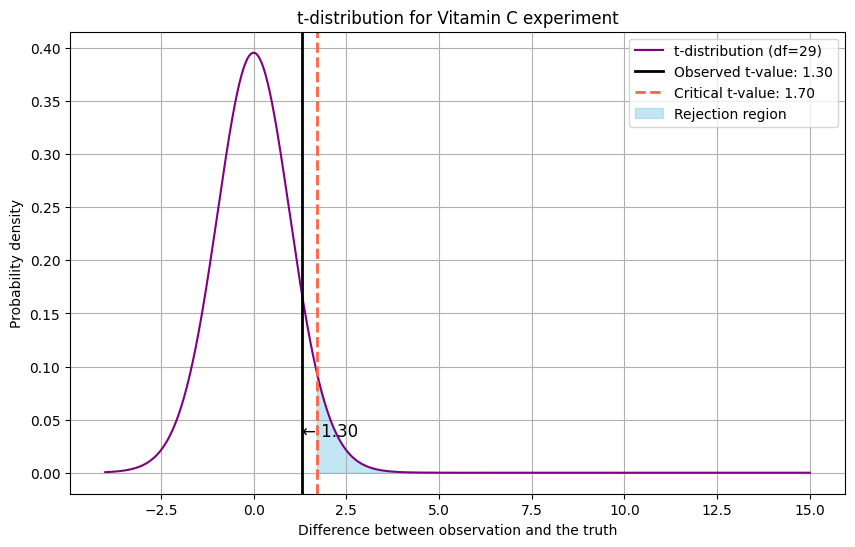

In [8]:
t_critical = t.ppf(1 - alpha, df)

x_values = np.linspace(-4, 15, 1000)
y_values = t.pdf(x_values, df)
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label=f't-distribution (df={df})', color='purple')
plt.axvline(statistic, color='black', linestyle='-', linewidth=2, label=f'Observed t-value: {statistic:.2f}')
plt.text(statistic, 0.03, f'← {statistic:.2f}', color='black', fontsize=12, verticalalignment='bottom')
plt.axvline(t_critical, color='tomato', linestyle='--', linewidth=2, label=f'Critical t-value: {t_critical:.2f}')
plt.fill_between(x_values, y_values, where=(x_values >= t_critical), color='skyblue', alpha=0.5, label='Rejection region')
plt.title('t-distribution for Vitamin C experiment')
plt.xlabel('Difference between observation and the truth')
plt.ylabel('Probability density')
plt.legend()
plt.grid(True)
plt.show()

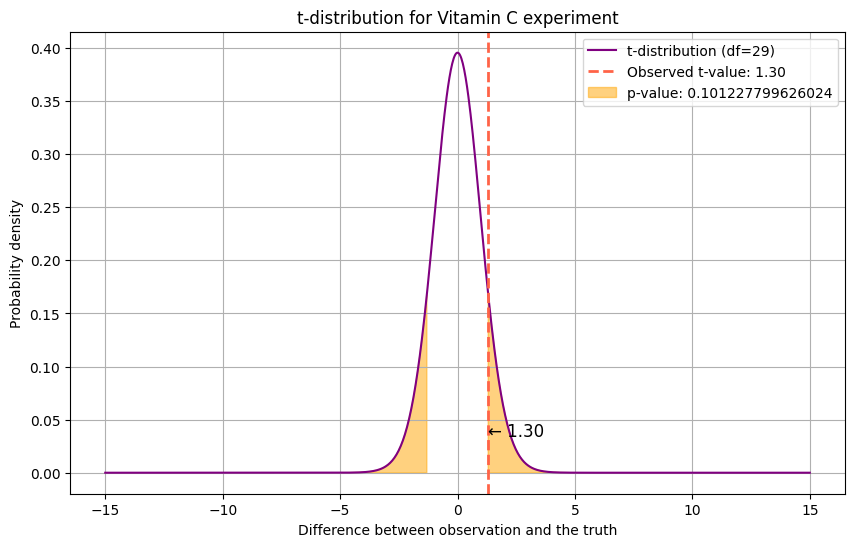

In [9]:
p_value = 1 - t.cdf(statistic, df)

x_values = np.linspace(-15, 15, 1000)
y_values = t.pdf(x_values, df)
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label=f't-distribution (df={df})', color='purple')
plt.axvline(statistic, color='tomato', linestyle='--', linewidth=2, label=f'Observed t-value: {statistic:.2f}')
plt.text(statistic, 0.03, f'← {statistic:.2f}', color='black', fontsize=12, verticalalignment='bottom')
plt.fill_between(x_values, y_values, where=(x_values >= statistic) | (x_values <= -statistic), color='orange', alpha=0.5, label=f'p-value: {p_value:.15f}')
plt.title('t-distribution for Vitamin C experiment')
plt.xlabel('Difference between observation and the truth')
plt.ylabel('Probability density')
plt.legend()
plt.grid(True)
plt.show()